In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import cycle
from matplotlib.patches import Rectangle

In [56]:
! rsync --progress "bluemoon-user1.uvm.edu:thesis/data/shanahan.csv" "../../data/shanahan.csv"

shanahan.csv
     5845771 100%   79.64MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 14384 bytes  received 176828 bytes  127474.67 bytes/sec
total size is 5845771  speedup is 30.57


In [57]:
with open("../../data/shanahan.csv", "r") as f:
    params = pd.read_csv(f, index_col=False)

params.head()

,run,alpha,beta,max_phase,chimera,metastability,r_bar
0,5,0.0,0.0000,6.283185,0.034718,0.032410,0.474835
1,8,0.0,0.0000,6.283185,0.027575,0.027699,0.421671
2,6,0.0,0.0000,6.283185,0.011886,0.011942,0.507999
3,7,0.0,0.0000,6.283185,0.016841,0.015993,0.500115
4,0,0.0,0.0101,6.283185,0.033719,0.034811,0.641607


In [58]:
%%time
good = params.copy()
bads = set()
for _, [alpha, beta] in good.loc[params["max_phase"] >= 2*np.pi,
                                 ["alpha", "beta"]].drop_duplicates().iterrows():
    bads.add((alpha, beta))

for bad in bads:
    good.loc[(good["beta"] == bad[1]) & (good["alpha"] == bad[0]),
             ["chimera", "r_bar", "metastability"]] = np.nan

CPU times: user 11.7 s, sys: 352 ms, total: 12 s
Wall time: 13.1 s


In [59]:
good.sort_values("metastability", ascending=False).head(10)

,run,alpha,beta,max_phase,chimera,metastability,r_bar
3002,1,0.03030,0.0000,6.283185,0.096936,0.090620,0.252823
4015,7,0.04040,0.0101,6.283185,0.094323,0.087962,0.390118
5019,7,0.05051,0.0101,6.283185,0.091142,0.085626,0.374556
3009,1,0.03030,0.0101,6.283185,0.090566,0.085060,0.301764
6011,0,0.06061,0.0101,6.283185,0.090063,0.084216,0.316200
3010,3,0.03030,0.0101,6.283185,0.089103,0.084155,0.387761
6010,5,0.06061,0.0101,6.283185,0.089219,0.084027,0.317254
4012,4,0.04040,0.0101,6.283185,0.089773,0.083985,0.409603
6023,2,0.06061,0.0202,6.283185,0.089621,0.083612,0.348405
5008,1,0.05051,0.0101,6.283185,0.089342,0.083373,0.276748


In [60]:
good.shape

(61000, 7)

In [61]:
good[good["max_phase"] <= 2*np.pi].shape

(47326, 7)

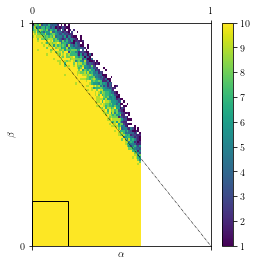

In [62]:
p = good[good["max_phase"] <= 2*np.pi].pivot_table(
    values="max_phase",index="beta", columns="alpha",
    aggfunc=len)
# p[p > 2*np.pi] = np.nan
# p[p <= 2*np.pi] = 1

plt.matshow(p.values[:, :], origin="lower", aspect="auto",
            extent=[p.columns.min(), p.columns.max(),
                    p.index.min(), p.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
# plt.savefig("../../final/figure/aphysical_chimera_smooth", dpi=700)

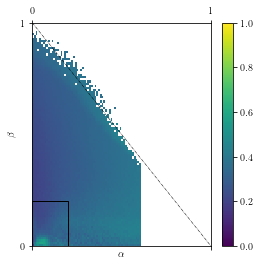

In [63]:
c = good.pivot_table(values="chimera", index="beta", columns="alpha"
                    )

plt.matshow(c.values[:, :]*7, origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
# plt.savefig("../../final/figure/aphysical_chimera_smooth", dpi=700)

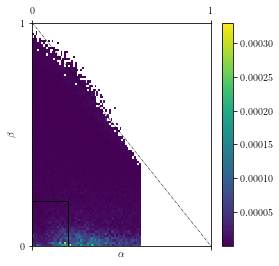

In [64]:
chi_var = good.pivot_table(values="chimera", index="beta", columns="alpha",
                           aggfunc=np.var
                          )

plt.matshow(chi_var.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
# plt.savefig("../../final/figure/aphysical_chimera", dpi=700)

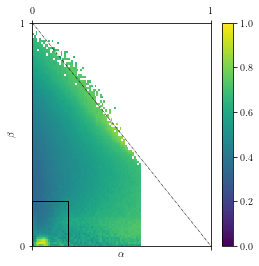

In [65]:
m = good.pivot_table(values="metastability", index="beta", columns="alpha",
                     aggfunc=np.mean
                    )

plt.matshow(m.values[:, :]*12, origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
# plt.savefig("../../final/figure/aphysical_chimera", dpi=700)

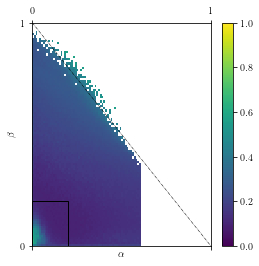

In [66]:
r = good.pivot_table(values="r_bar", index="beta", columns="alpha",
                     aggfunc=np.mean
                    )

plt.matshow(r.values[:, :], origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
# plt.savefig("../../final/figure/aphysical_r_bar", dpi=700)

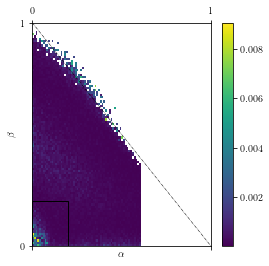

In [67]:
r_var = good.pivot_table(values="r_bar", index="beta", columns="alpha",
                         aggfunc=np.var
                        )

plt.matshow(r_var.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
# plt.savefig("../../final/figure/aphysical_chimera", dpi=700)